In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pratapwarrohit13/Pytorch/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
from pycaret.classification import *

In [5]:
exp = setup(data=df,target='Outcome',session_id=123)

,Description,Value
0,session_id,123
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7748,0.8316,0.6000,0.7100,0.6372,0.4773,0.4904,3.0340
lr,Logistic Regression,0.7582,0.8035,0.5056,0.6990,0.5804,0.4181,0.4326,0.9000
gbc,Gradient Boosting Classifier,0.7562,0.8239,0.5667,0.6731,0.6031,0.4314,0.4431,0.0940
ada,Ada Boost Classifier,0.7526,0.8016,0.5889,0.6524,0.6091,0.4310,0.4394,0.0840
lightgbm,Light Gradient Boosting Machine,0.7524,0.8028,0.5778,0.6614,0.6086,0.4299,0.4381,0.1040
rf,Random Forest Classifier,0.7488,0.8035,0.5111,0.6849,0.5740,0.4023,0.4182,0.2720
ridge,Ridge Classifier,0.7452,0.0000,0.4722,0.6844,0.5492,0.3816,0.3997,0.0240
lda,Linear Discriminant Analysis,0.7452,0.7912,0.4833,0.6783,0.5563,0.3859,0.4017,0.0210
xgboost,Extreme Gradient Boosting,0.7449,0.7896,0.5722,0.6442,0.5984,0.4140,0.4207,0.3340
knn,K Neighbors Classifier,0.7153,0.7261,0.5111,0.5962,0.5405,0.3379,0.3467,0.0670


In [7]:
print(best_model)

In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6481,0.5833,0.3889,0.4667,0.4242,0.1739,0.1754
1,0.7222,0.7083,0.6667,0.5714,0.6154,0.4000,0.4029
2,0.7222,0.7083,0.6667,0.5714,0.6154,0.4000,0.4029
3,0.7778,0.7500,0.6667,0.6667,0.6667,0.5000,0.5000
4,0.6296,0.5972,0.5000,0.4500,0.4737,0.1892,0.1898
5,0.7778,0.7778,0.7778,0.6364,0.7000,0.5263,0.5330
6,0.7222,0.6667,0.5000,0.6000,0.5455,0.3478,0.3508
7,0.5472,0.4817,0.2778,0.3125,0.2941,-0.0375,-0.0377
8,0.7358,0.7325,0.7222,0.5909,0.6500,0.4413,0.4470
9,0.7925,0.7349,0.5556,0.7692,0.6452,0.5038,0.5172


In [10]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [11]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.6535,0.5000,0.5625,0.5294,0.3143,0.3154
1,0.6667,0.6350,0.5000,0.5000,0.5000,0.2500,0.2500
2,0.6481,0.7130,0.4444,0.4706,0.4571,0.1972,0.1974
3,0.6852,0.7353,0.5000,0.5294,0.5143,0.2817,0.2819
4,0.7037,0.6659,0.3889,0.5833,0.4667,0.2727,0.2835
5,0.8148,0.8210,0.8333,0.6818,0.7500,0.6053,0.6130
6,0.6852,0.7122,0.4444,0.5333,0.4848,0.2609,0.2631
7,0.6226,0.6349,0.2778,0.4167,0.3333,0.0846,0.0880
8,0.7925,0.8405,0.7222,0.6842,0.7027,0.5435,0.5439
9,0.8302,0.8500,0.5000,1.0000,0.6667,0.5691,0.6307


In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7315,0.5556,0.5882,0.5714,0.3662,0.3665
1,0.7407,0.7708,0.5556,0.6250,0.5882,0.4000,0.4015
2,0.7222,0.8194,0.4444,0.6154,0.5161,0.3284,0.3369
3,0.6852,0.7647,0.3889,0.5385,0.4516,0.2388,0.2450
4,0.7222,0.7099,0.4444,0.6154,0.5161,0.3284,0.3369
5,0.7593,0.8773,0.6667,0.6316,0.6486,0.4658,0.4661
6,0.7778,0.8395,0.5000,0.7500,0.6000,0.4545,0.4725
7,0.7925,0.7294,0.5000,0.8182,0.6207,0.4890,0.5171
8,0.7736,0.8595,0.6667,0.6667,0.6667,0.4952,0.4952
9,0.7925,0.9333,0.3889,1.0000,0.5600,0.4567,0.5440


In [13]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7731,0.6111,0.5789,0.5946,0.3836,0.3839
1,0.8148,0.8225,0.7222,0.7222,0.7222,0.5833,0.5833
2,0.7593,0.8179,0.5556,0.6667,0.6061,0.4348,0.4385
3,0.7407,0.8040,0.5000,0.6429,0.5625,0.3824,0.3884
4,0.7037,0.7654,0.4444,0.5714,0.5000,0.2941,0.2988
5,0.7778,0.8889,0.7222,0.6500,0.6842,0.5135,0.5152
6,0.8333,0.8410,0.6111,0.8462,0.7097,0.5970,0.6126
7,0.7925,0.7698,0.5556,0.7692,0.6452,0.5038,0.5172
8,0.7925,0.8857,0.8333,0.6522,0.7317,0.5665,0.5779
9,0.8113,0.9476,0.4444,1.0000,0.6154,0.5138,0.5879


In [14]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6481,0.6829,0.4444,0.4706,0.4571,0.1972,0.1974
1,0.6852,0.6875,0.5000,0.5294,0.5143,0.2817,0.2819
2,0.7593,0.8009,0.6111,0.6471,0.6286,0.4507,0.4511
3,0.7407,0.7662,0.6111,0.6111,0.6111,0.4167,0.4167
4,0.7222,0.7160,0.6667,0.5714,0.6154,0.4000,0.4029
5,0.7593,0.7924,0.6111,0.6471,0.6286,0.4507,0.4511
6,0.7037,0.6890,0.6111,0.5500,0.5789,0.3514,0.3525
7,0.7170,0.6714,0.5556,0.5882,0.5714,0.3604,0.3607
8,0.6792,0.7833,0.6111,0.5238,0.5641,0.3127,0.3151
9,0.8302,0.8786,0.5556,0.9091,0.6897,0.5819,0.6154


In [15]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [16]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7407,0.6512,0.4444,0.6667,0.5333,0.3636,0.3780
1,0.7037,0.7423,0.3889,0.5833,0.4667,0.2727,0.2835
2,0.7407,0.7747,0.4444,0.6667,0.5333,0.3636,0.3780
3,0.6852,0.7932,0.3889,0.5385,0.4516,0.2388,0.2450
4,0.7037,0.7006,0.3333,0.6000,0.4286,0.2500,0.2697
5,0.8333,0.8611,0.6667,0.8000,0.7273,0.6087,0.6139
6,0.7037,0.7361,0.3889,0.5833,0.4667,0.2727,0.2835
7,0.6792,0.6603,0.3889,0.5385,0.4516,0.2332,0.2394
8,0.8302,0.8206,0.6667,0.8000,0.7273,0.6055,0.6108
9,0.7736,0.9127,0.3889,0.8750,0.5385,0.4165,0.4767


In [17]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7593,0.6667,0.5217,0.5854,0.3377,0.3443
1,0.6852,0.7793,0.7778,0.5185,0.6222,0.3704,0.3928
2,0.7778,0.8256,0.8333,0.6250,0.7143,0.5385,0.5534
3,0.7593,0.7855,0.6667,0.6316,0.6486,0.4658,0.4661
4,0.7037,0.7284,0.6667,0.5455,0.6000,0.3684,0.3731
5,0.7593,0.8719,0.8333,0.6000,0.6977,0.5063,0.5252
6,0.8333,0.8519,0.7778,0.7368,0.7568,0.6301,0.6307
7,0.6981,0.7667,0.6667,0.5455,0.6000,0.3614,0.3661
8,0.7358,0.8762,0.8333,0.5769,0.6818,0.4685,0.4917
9,0.8113,0.9143,0.6111,0.7857,0.6875,0.5554,0.5644


In [18]:
tuned_cat = tune_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7593,0.7901,0.6111,0.6471,0.6286,0.4507,0.4511
1,0.7778,0.7932,0.6111,0.6875,0.6471,0.4857,0.4875
2,0.8148,0.8580,0.6667,0.7500,0.7059,0.5714,0.5735
3,0.7037,0.7917,0.4444,0.5714,0.5000,0.2941,0.2988
4,0.6852,0.7654,0.3889,0.5385,0.4516,0.2388,0.2450
5,0.7778,0.8981,0.6111,0.6875,0.6471,0.4857,0.4875
6,0.7963,0.8225,0.5000,0.8182,0.6207,0.4923,0.5202
7,0.8113,0.8063,0.5556,0.8333,0.6667,0.5423,0.5640
8,0.8302,0.8937,0.8333,0.7143,0.7692,0.6362,0.6409
9,0.8302,0.9413,0.5000,1.0000,0.6667,0.5691,0.6307


In [19]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.6404,0.3889,0.5833,0.4667,0.2727,0.2835
1,0.7222,0.7353,0.3889,0.6364,0.4828,0.3077,0.3251
2,0.7593,0.7531,0.4444,0.7273,0.5517,0.4000,0.4227
3,0.6852,0.7631,0.3333,0.5455,0.4138,0.2154,0.2276
4,0.6667,0.6983,0.2778,0.5000,0.3571,0.1562,0.1685
5,0.7593,0.8264,0.4444,0.7273,0.5517,0.4000,0.4227
6,0.7593,0.7415,0.3889,0.7778,0.5185,0.3810,0.4216
7,0.6415,0.6492,0.1667,0.4286,0.2400,0.0615,0.0733
8,0.8113,0.7976,0.6111,0.7857,0.6875,0.5554,0.5644
9,0.7547,0.8976,0.3333,0.8571,0.4800,0.3579,0.4263


In [20]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=28, p=2,
                     weights='uniform')


In [21]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7593,0.6667,0.5217,0.5854,0.3377,0.3443
1,0.6852,0.7793,0.7778,0.5185,0.6222,0.3704,0.3928
2,0.7778,0.8256,0.8333,0.6250,0.7143,0.5385,0.5534
3,0.7593,0.7855,0.6667,0.6316,0.6486,0.4658,0.4661
4,0.7037,0.7284,0.6667,0.5455,0.6000,0.3684,0.3731
5,0.7593,0.8719,0.8333,0.6000,0.6977,0.5063,0.5252
6,0.8333,0.8519,0.7778,0.7368,0.7568,0.6301,0.6307
7,0.6981,0.7667,0.6667,0.5455,0.6000,0.3614,0.3661
8,0.7358,0.8762,0.8333,0.5769,0.6818,0.4685,0.4917
9,0.8113,0.9143,0.6111,0.7857,0.6875,0.5554,0.5644


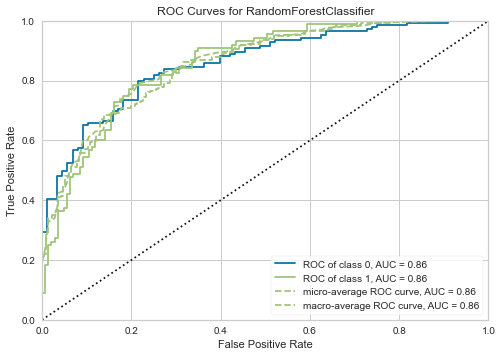

In [22]:
plot_model(tuned_rf, plot = 'auc')

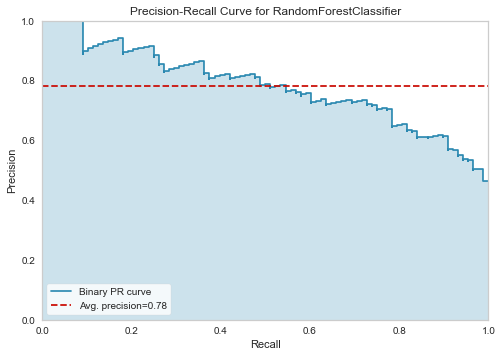

In [23]:

plot_model(tuned_rf, plot = 'pr')

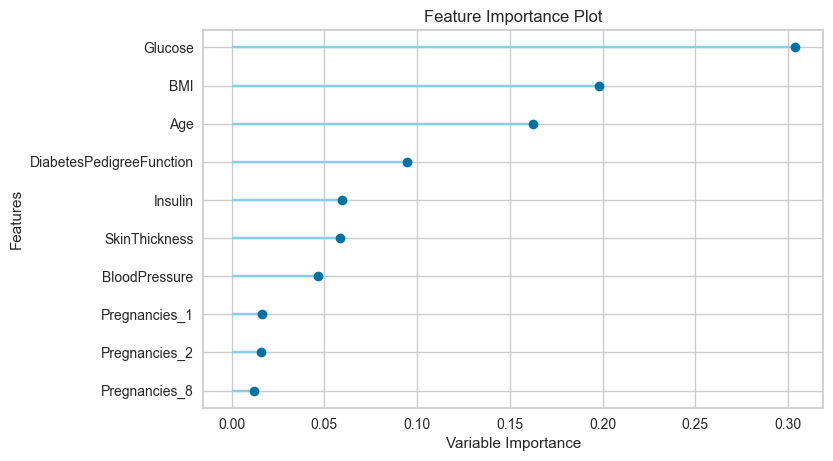

In [24]:
plot_model(tuned_rf, plot='feature')

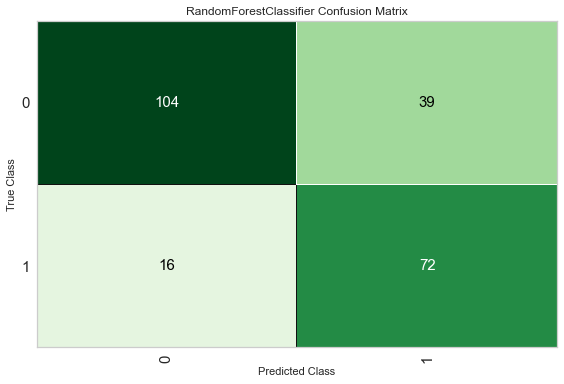

In [25]:

plot_model(tuned_rf, plot = 'confusion_matrix')

In [26]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
predict_model(tuned_cat);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7576,0.8574,0.5909,0.7222,0.6500,0.4674,0.4729


In [28]:
final_cat = finalize_model(tuned_cat)

In [29]:
print(final_cat)

In [30]:
predict_model(final_cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8268,0.9126,0.7045,0.8158,0.7561,0.6230,0.6270


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_0,Pregnancies_1,Pregnancies_10,...,Pregnancies_3,Pregnancies_4,Pregnancies_5,Pregnancies_6,Pregnancies_7,Pregnancies_8,Pregnancies_9,Outcome,Label,Score
0,181.0,84.0,21.0,192.0,35.900002,0.586,51.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.8917
1,127.0,58.0,24.0,275.0,27.700001,1.600,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8123
2,138.0,76.0,0.0,0.0,33.200001,0.420,35.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5810
3,81.0,60.0,22.0,0.0,27.700001,0.290,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9461
4,84.0,82.0,31.0,125.0,38.200001,0.233,23.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,107.0,74.0,30.0,100.0,33.599998,0.404,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8352
227,180.0,64.0,25.0,70.0,34.000000,0.271,26.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.7381
228,125.0,96.0,0.0,0.0,22.500000,0.262,21.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9246
229,121.0,78.0,39.0,74.0,39.000000,0.261,28.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7622


In [31]:
save_model(final_cat,'Final catboost Model 16APR2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Outcome',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Outcome')),
                 ('fix_perfect', Remove_100(target='Outcome')),
                 ('clean_names'